# Forensic Root Cause Analysis Report

This report provides a hierarchical view of benchmark failures from the **last 10 runs**, analyzed by Gemini 2.0. The analysis is broken down by benchmark suite to highlight specific failure patterns.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json
from IPython.display import display, HTML, Markdown

# Connect to Database
DB_PATH = "/Users/ivanmkc/Documents/code/agent-generator/benchmarks/analysis_cache.db"
conn = sqlite3.connect(DB_PATH)

# Load Data
query = """
SELECT 
    run_id, 
    generator, 
    suite, 
    benchmark_name, 
    attempt_number, 
    llm_root_cause,
    llm_analysis
FROM failures
WHERE llm_root_cause IS NOT NULL
ORDER BY run_id DESC, generator, suite, benchmark_name, attempt_number
"""
df = pd.read_sql_query(query, conn)

# Parse JSON forensics
def parse_forensics(row):
    try:
        data = json.loads(row['llm_analysis'])
        return pd.Series({
            'narrative': data.get('explanation', 'N/A'),
            'citations': " | ".join(data.get('evidence', data.get('citations', []))),
            'tool_audit': str(data.get('tool_audit', ''))
        })
    except:
        return pd.Series({'narrative': 'Parse Error', 'citations': 'N/A', 'tool_audit': 'N/A'})

forensics = df.apply(parse_forensics, axis=1)
df = pd.concat([df, forensics], axis=1)

print(f"Total failures analyzed: {len(df)}")

Total failures analyzed: 726


## Global Failure Trends

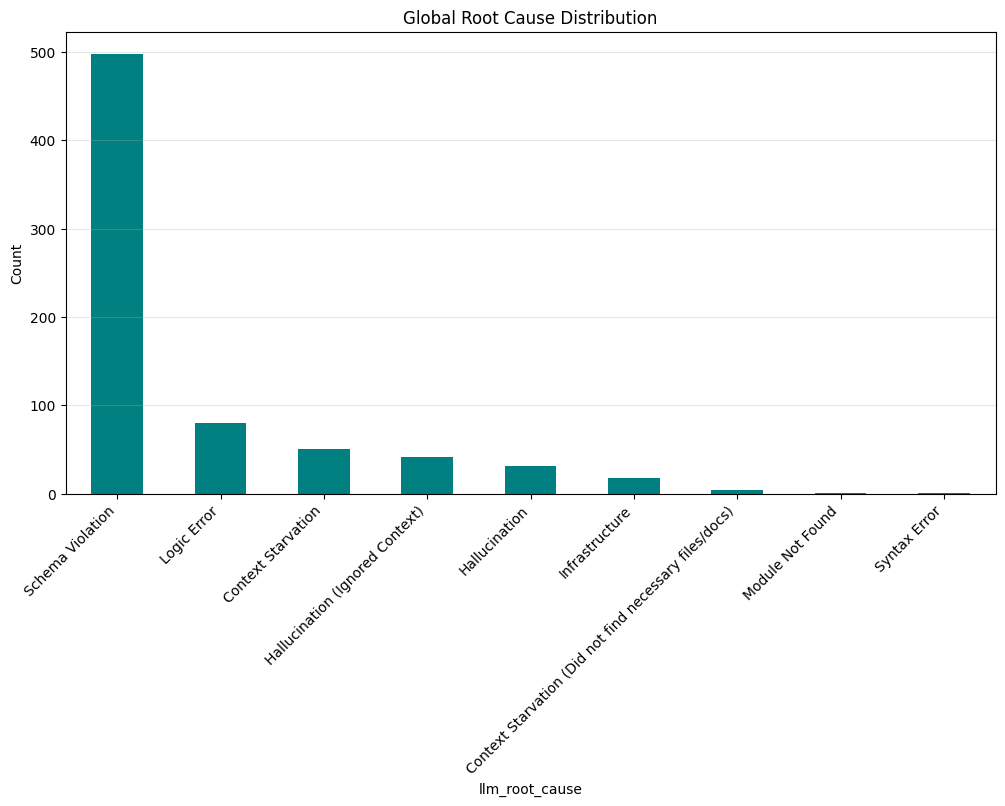

In [2]:
if not df.empty:
    plt.figure(figsize=(12, 6))
    df['llm_root_cause'].value_counts().plot(kind='bar', color='teal')
    plt.title('Global Root Cause Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
else:
    print("No analyzed failures found.")

## Analysis by Benchmark Suite
Breakdown of root causes for each test suite.

### Suite: `fix_errors`

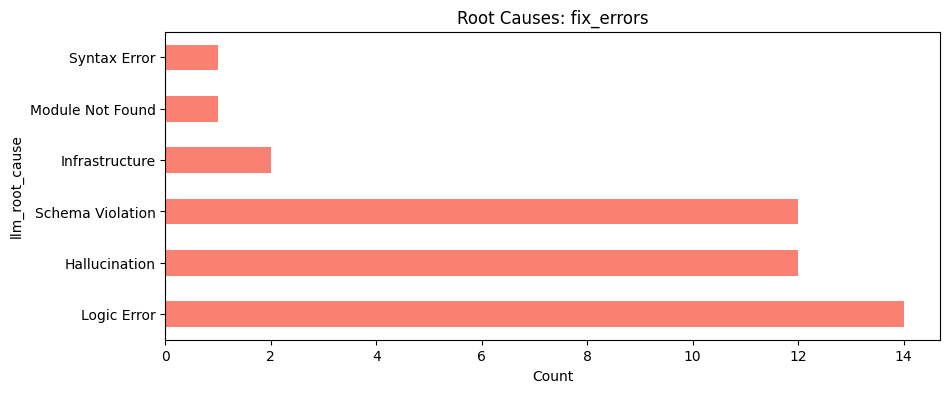

**Top Failure Examples (fix_errors):**

,generator,benchmark_name,llm_root_cause,narrative
0,ADK_CODING_V38(Decoupled),01: A minimal LlmAgent.,Hallucination,The agent hallucinated the module `google.adk....
1,ADK_CODING_V38(Decoupled),02: An LlmAgent with a simple function tool.,Schema Violation,The agent failed because the LlmAgent construc...
2,ADK_CODING_V38(Decoupled),03: An LlmAgent that uses output_schema to enf...,Hallucination,The agent initially produced code that attempt...
3,ADK_CODING_V38(Decoupled),04: A SequentialAgent orchestrating two simple...,Hallucination,The agent hallucinated the arguments for the `...
4,ADK_CODING_V38(Decoupled),05: A ParallelAgent running two agents concurr...,Schema Violation,The coding expert provided a Linter class inst...


---

### Suite: `api_understanding`

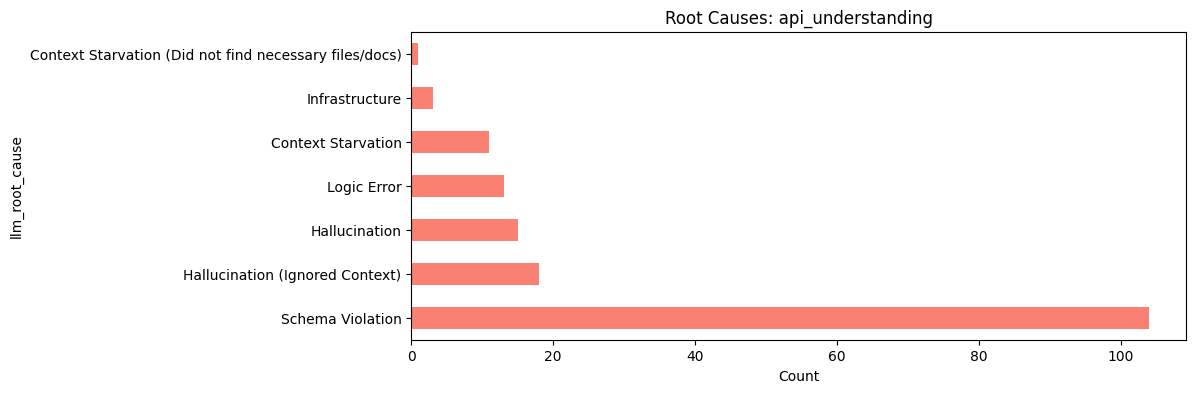

**Top Failure Examples (api_understanding):**

,generator,benchmark_name,llm_root_cause,narrative
23,ADK_KNOWLEDGE_V37(Decoupled),What is the `CallbackContext` object?,Logic Error,The agent successfully identified the relevant...
24,ADK_KNOWLEDGE_V37(Decoupled),What is the `InvocationContext` object?,Logic Error,The agent successfully identified the `Invocat...
25,ADK_KNOWLEDGE_V37(Decoupled),What is the abstract base class for implementi...,Hallucination (Ignored Context),The agent initially selected `BaseAgent` as th...
26,ADK_KNOWLEDGE_V37(Decoupled),What is the base class for all tools?,Logic Error,The agent initially correctly identifies `goog...
27,ADK_KNOWLEDGE_V37(Decoupled),What is the base class for managing and dynami...,Context Starvation,The agent attempted to find the base class for...


---

### Suite: `configure_adk_features_mc`

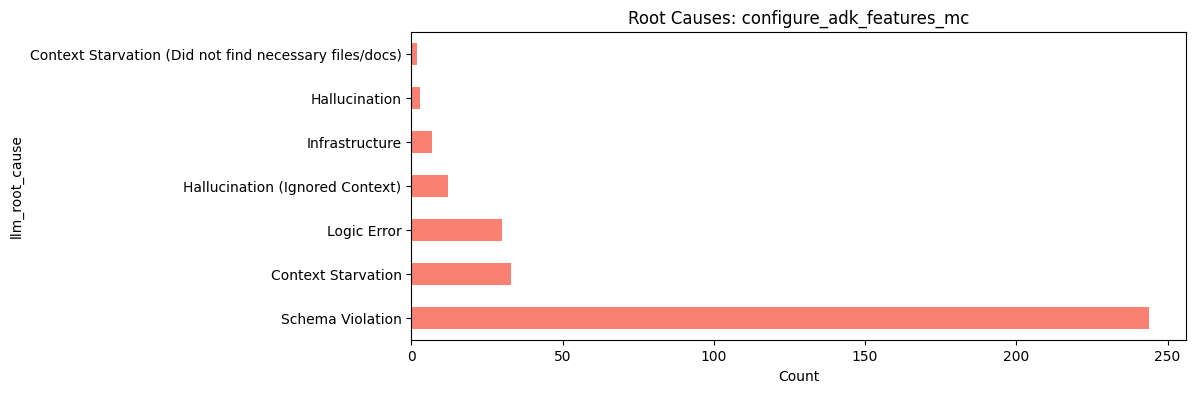

**Top Failure Examples (configure_adk_features_mc):**

,generator,benchmark_name,llm_root_cause,narrative
53,ADK_KNOWLEDGE_V37(Decoupled),How do you configure an app to support pausing...,Logic Error,The agent successfully fetched documentation f...
54,ADK_KNOWLEDGE_V37(Decoupled),How do you correctly construct a user message ...,Logic Error,The agent correctly identified the relevant mo...
55,ADK_KNOWLEDGE_V37(Decoupled),How do you enable `CodeExecutionTool` via conf...,Hallucination (Ignored Context),The `seed_selector_agent` correctly identified...
56,ADK_KNOWLEDGE_V37(Decoupled),How do you enable `GoogleSearchTool` via confi...,Schema Violation,The agent successfully fetched relevant module...
57,ADK_KNOWLEDGE_V37(Decoupled),How do you enable `VertexAISearchTool` via con...,Schema Violation,The agent successfully loaded the necessary in...


---

### Suite: `diagnose_setup_errors_mc`

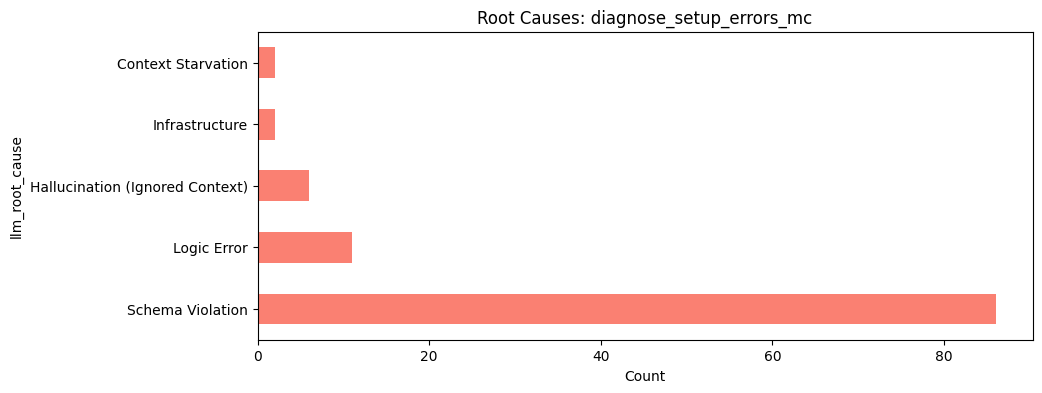

**Top Failure Examples (diagnose_setup_errors_mc):**

,generator,benchmark_name,llm_root_cause,narrative
125,ADK_KNOWLEDGE_V37(Decoupled),How should sub-agents be passed to `Sequential...,Logic Error,The agent correctly fetched the relevant modul...
126,ADK_KNOWLEDGE_V37(Decoupled),What data type does the `input_schema` argumen...,Logic Error,The agent correctly identified that the `input...
127,ADK_KNOWLEDGE_V37(Decoupled),What is the correct parameter name for enforci...,Logic Error,The agent correctly identified that the `forma...
128,ADK_KNOWLEDGE_V37(Decoupled),What is the primary reason this `LlmAgent` ins...,Schema Violation,"The `knowledge_expert` agent, after receiving ..."
129,ADK_KNOWLEDGE_V37(Decoupled),Which argument is missing in this `Runner` ini...,Schema Violation,The agent failed to produce a valid JSON outpu...


---

### Suite: `predict_runtime_behavior_mc`

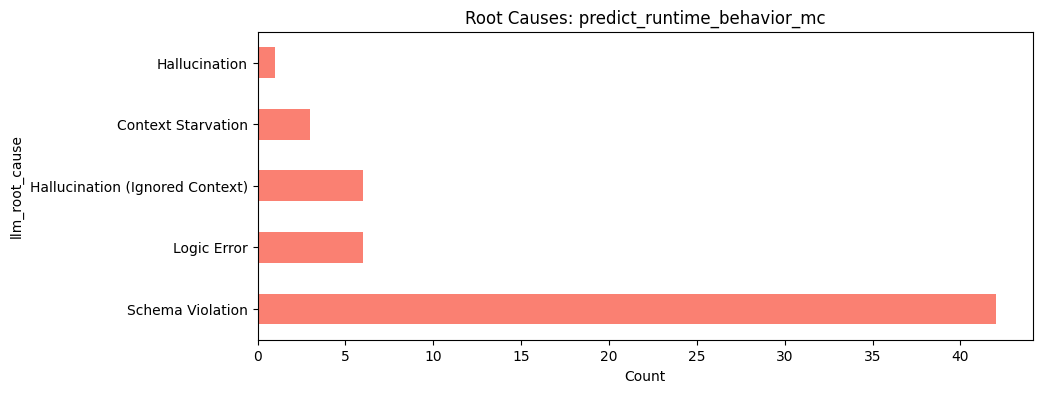

**Top Failure Examples (predict_runtime_behavior_mc):**

,generator,benchmark_name,llm_root_cause,narrative
151,ADK_KNOWLEDGE_V37(Decoupled),In what order will the callbacks and agent out...,Logic Error,The agent correctly identified the relevant mo...
152,ADK_KNOWLEDGE_V37(Decoupled),Is the `name` attribute mutable?...,Schema Violation,The agent failed to provide an answer in the f...
153,ADK_KNOWLEDGE_V37(Decoupled),Predict the error (if any) when running the fo...,Logic Error,The agent correctly identified that duplicate ...
154,ADK_KNOWLEDGE_V37(Decoupled),Predict the error:...,Hallucination (Ignored Context),The agent correctly identified that the `Gener...
155,ADK_KNOWLEDGE_V37(Decoupled),Predict the error:...,Hallucination (Ignored Context),The agent correctly identified that the `Gener...


---

### Suite: `debug_single`

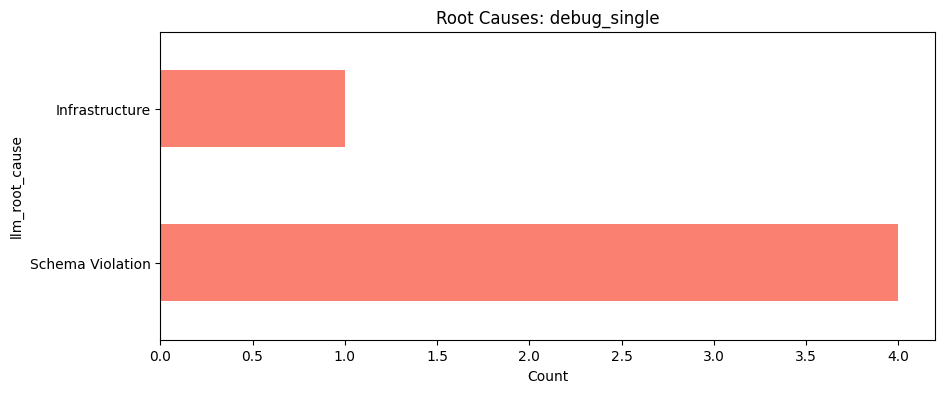

**Top Failure Examples (debug_single):**

,generator,benchmark_name,llm_root_cause,narrative
164,ADK_KNOWLEDGE_V37(Decoupled),What does `RunConfig.proactivity` control?...,Infrastructure,The agent failed due to a RESOURCE_EXHAUSTED e...
165,ADK_KNOWLEDGE_V37(Decoupled),What does `RunConfig.proactivity` control?...,Schema Violation,The agent correctly identified the answer and ...
166,ADK_KNOWLEDGE_V37(Decoupled),What does `RunConfig.proactivity` control?...,Schema Violation,The agent correctly identified the answer and ...
167,ADK_KNOWLEDGE_V37(Decoupled),What does `RunConfig.proactivity` control?...,Schema Violation,The agent successfully identified the correct ...
168,ADK_KNOWLEDGE_V37(Decoupled),What does `RunConfig.proactivity` control?...,Schema Violation,The agent failed to return a valid JSON object...


---

### Suite: `debug_suite`

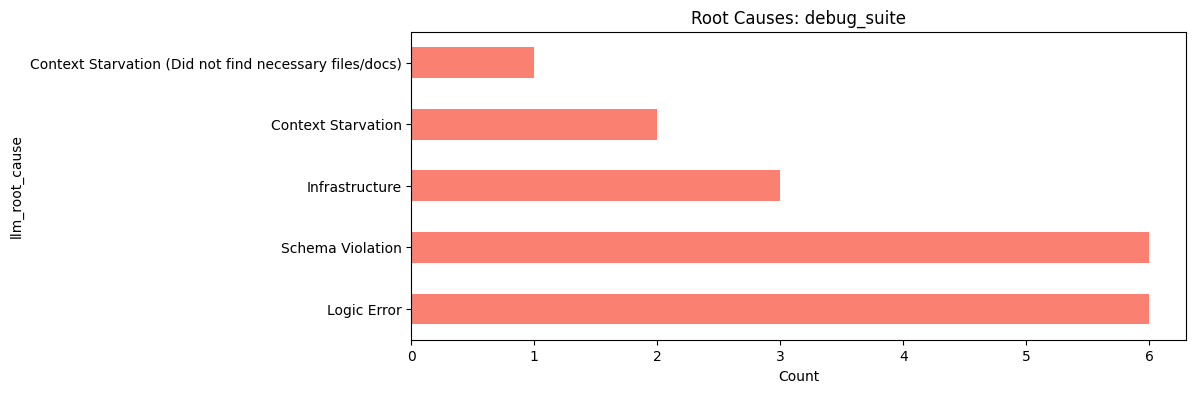

**Top Failure Examples (debug_suite):**

,generator,benchmark_name,llm_root_cause,narrative
690,ADK_STATISTICAL_V36(Mixed),22: Implement a custom LogicAgent from scratch.,Logic Error,The agent initially failed because the `create...
691,ADK_STATISTICAL_V35(Mixed),22: Implement a custom LogicAgent from scratch.,Logic Error,The agent initially failed because it did not ...
692,ADK_STATISTICAL_V35(Mixed),What is the foundational class for all agents ...,Schema Violation,The finalizer agent produced a JSON object tha...
693,ADK_STATISTICAL_V35(Mixed),22: Implement a custom LogicAgent from scratch.,Logic Error,The agent initially failed because it did not ...
694,ADK_STATISTICAL_V35(Mixed),What is the foundational class for all agents ...,Infrastructure,The agent failed due to a 429 RESOURCE_EXHAUST...


---

In [3]:
if not df.empty:
    suites = df['suite'].unique()
    for suite in suites:
        display(Markdown(f"### Suite: `{suite}`"))
        suite_df = df[df['suite'] == suite]
        
        # Chart
        plt.figure(figsize=(10, 4))
        suite_df['llm_root_cause'].value_counts().plot(kind='barh', color='salmon')
        plt.title(f'Root Causes: {suite}')
        plt.xlabel('Count')
        plt.show()
        
        # Detailed Table (Top 5 Failures)
        display(Markdown(f"**Top Failure Examples ({suite}):**"))
        display(suite_df[['generator', 'benchmark_name', 'llm_root_cause', 'narrative']].head(5))
        display(Markdown("---"))
else:
    print("No data available.")